<img src="https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# **Proyecto Individual 2 - Machine Learning**

<hr style="margin-bottom: 40px;">


# `Análisis Exploratorio de Datos`
![divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

- #### **Importamos las librerías a utilizar**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- #### **Creo mi Dataframe con el que voy a trabajar**

In [2]:
data = pd.read_csv('./Datasets/hospitalizaciones_train.csv')

In [3]:
data.dtypes

Available Extra Rooms in Hospital      int64
Department                            object
Ward_Facility_Code                    object
doctor_name                           object
staff_available                        int64
patientid                              int64
Age                                   object
gender                                object
Type of Admission                     object
Severity of Illness                   object
health_conditions                     object
Visitors with Patient                  int64
Insurance                             object
Admission_Deposit                    float64
Stay (in days)                         int64
dtype: object

In [5]:
print(f'cantidad de registros: {data.shape[0]} y cantidad de columnas: {data.shape[1]}')

cantidad de registros: 410000 y cantidad de columnas: 15


- #### **Normalizo el nombre de las columnas, para un mejor control.**

In [6]:
#nuevo nombre de las columnas:

New_cols = ['Hab_Disponibles', 'Departamento', 'Codigo_Hab', 'Nombre_Medico', 'Staff_Disponible', 'IdPaciente', 'Rango_Etario', 'Genero', 'Tipo_Ingreso', 'Gravedad_Enfermedad', 'Condicion_Salud', 'Visitantes', 'Seguro', 'Deposito_Ingreso', 'Estadia' ]

In [7]:
#Asigno a mi dataframe los nuevos nombres de columna
data.columns = New_cols

In [8]:
data.head()

,Hab_Disponibles,Departamento,Codigo_Hab,Nombre_Medico,Staff_Disponible,IdPaciente,Rango_Etario,Genero,Tipo_Ingreso,Gravedad_Enfermedad,Condicion_Salud,Visitantes,Seguro,Deposito_Ingreso,Estadia
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


# `Preprocesamiento de Datos`
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

- #### **Reviso cantidad de registros, cantidad de columnas y si hay valores nulos.**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Hab_Disponibles      410000 non-null  int64  
 1   Departamento         410000 non-null  object 
 2   Codigo_Hab           410000 non-null  object 
 3   Nombre_Medico        410000 non-null  object 
 4   Staff_Disponible     410000 non-null  int64  
 5   IdPaciente           410000 non-null  int64  
 6   Rango_Etario         410000 non-null  object 
 7   Genero               410000 non-null  object 
 8   Tipo_Ingreso         410000 non-null  object 
 9   Gravedad_Enfermedad  410000 non-null  object 
 10  Condicion_Salud      410000 non-null  object 
 11  Visitantes           410000 non-null  int64  
 12  Seguro               410000 non-null  object 
 13  Deposito_Ingreso     410000 non-null  float64
 14  Estadia              410000 non-null  int64  
dtypes: float64(1), in

- #### **Verifico si hay duplicados.**

In [10]:
data[data.duplicated()]

,Hab_Disponibles,Departamento,Codigo_Hab,Nombre_Medico,Staff_Disponible,IdPaciente,Rango_Etario,Genero,Tipo_Ingreso,Gravedad_Enfermedad,Condicion_Salud,Visitantes,Seguro,Deposito_Ingreso,Estadia


- #### **Busco valores nulos.**

In [11]:
#guardo en una variable el nombre de las columnas de mi df
columnas = data.columns.to_list()

In [12]:
#Itero sobre mi lista de columnas:
for i in columnas:
    print(f'valores nulos en {i}:', data[i].isnull().sum(), sep='  ==========>  ')

valores nulos en Hab_Disponibles:  ==========>  0
valores nulos en Departamento:  ==========>  0
valores nulos en Codigo_Hab:  ==========>  0
valores nulos en Nombre_Medico:  ==========>  0
valores nulos en Staff_Disponible:  ==========>  0
valores nulos en IdPaciente:  ==========>  0
valores nulos en Rango_Etario:  ==========>  0
valores nulos en Genero:  ==========>  0
valores nulos en Tipo_Ingreso:  ==========>  0
valores nulos en Gravedad_Enfermedad:  ==========>  0
valores nulos en Condicion_Salud:  ==========>  0
valores nulos en Visitantes:  ==========>  0
valores nulos en Seguro:  ==========>  0
valores nulos en Deposito_Ingreso:  ==========>  0
valores nulos en Estadia:  ==========>  0


In [13]:
for i in columnas:
    print(f'valores nulos en {i}', data[i].isna().sum(), sep='  ==========>  ')


valores nulos en Hab_Disponibles  ==========>  0
valores nulos en Departamento  ==========>  0
valores nulos en Codigo_Hab  ==========>  0
valores nulos en Nombre_Medico  ==========>  0
valores nulos en Staff_Disponible  ==========>  0
valores nulos en IdPaciente  ==========>  0
valores nulos en Rango_Etario  ==========>  0
valores nulos en Genero  ==========>  0
valores nulos en Tipo_Ingreso  ==========>  0
valores nulos en Gravedad_Enfermedad  ==========>  0
valores nulos en Condicion_Salud  ==========>  0
valores nulos en Visitantes  ==========>  0
valores nulos en Seguro  ==========>  0
valores nulos en Deposito_Ingreso  ==========>  0
valores nulos en Estadia  ==========>  0


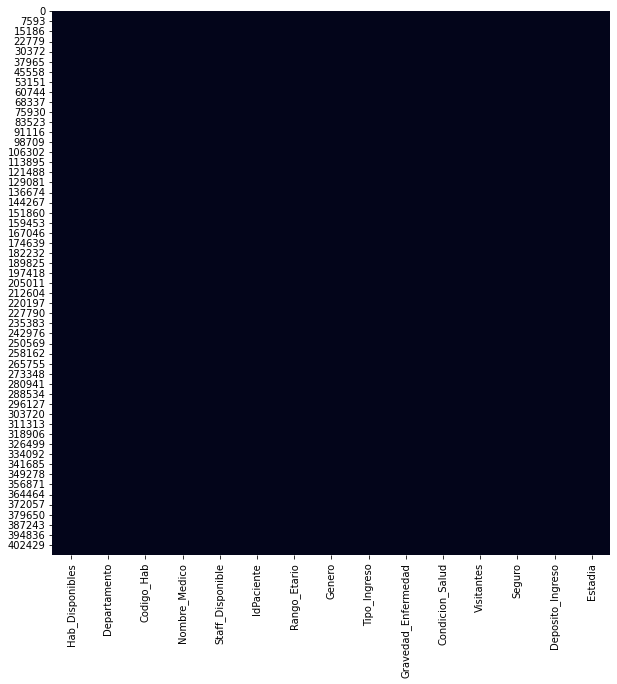

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.isnull(), cbar=False)
plt.show()


- #### **Identifico outliers.**

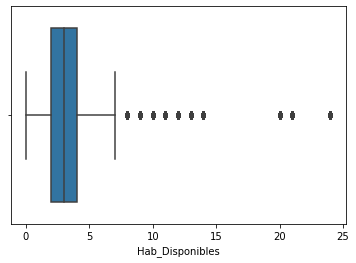

In [15]:
sns.boxplot(x='Hab_Disponibles', data=data);

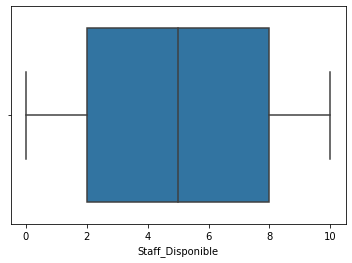

In [16]:
sns.boxplot(x='Staff_Disponible', data=data);

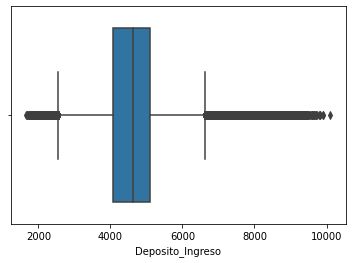

In [17]:
sns.boxplot(x='Deposito_Ingreso', data=data);

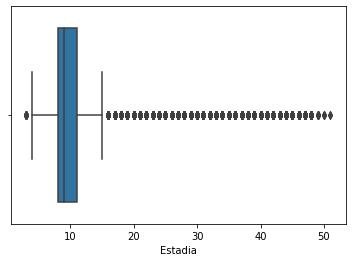

In [18]:
sns.boxplot(x='Estadia', data=data);

- #### **Codificación de Variables Categóricas.**

Hago la codificación para poder trabajar con valores numéricos.

In [19]:
#posibles features que puedo codificar

columnas_categoricas = ['Departamento', 'Codigo_Hab', 'Rango_Etario', 'Genero', 'Tipo_Ingreso', 'Gravedad_Enfermedad', 'Condicion_Salud', 'Seguro']

In [20]:
for i in columnas_categoricas:
    print(f'categorías de {i}:', data[i].unique().tolist(), sep=' ==========> ')

categorías de Departamento: ==========> ['gynecology', 'anesthesia', 'TB & Chest disease', 'radiotherapy', 'surgery']
categorías de Codigo_Hab: ==========> ['D', 'B', 'E', 'F', 'A', 'C']
categorías de Rango_Etario: ==========> ['41-50', '31-40', '21-30', '71-80', '11-20', '51-60', '61-70', '81-90', '91-100', '0-10']
categorías de Genero: ==========> ['Female', 'Male', 'Other']
categorías de Tipo_Ingreso: ==========> ['Trauma', 'Urgent', 'Emergency']
categorías de Gravedad_Enfermedad: ==========> ['Extreme', 'Minor', 'Moderate']
categorías de Condicion_Salud: ==========> ['Diabetes', 'Heart disease', 'None', 'Other', 'Asthama', 'High Blood Pressure']
categorías de Seguro: ==========> ['Yes', 'No']


##### Se usará **OneHotEncoder** para las features con categorías de tipo _nominal_, **OrdinalEncoder** para categorías de tipo _ordinal_.

In [21]:
#importo las clases necesarias para el encoding

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

##### Empiezo con las categorías de tipo **_nominal_**
las columnas a codificar serán: 
1) Genero
2) Tipo_Ingreso
3) Seguro

In [22]:
#Codifico la columna 'Genero'

data_encoded = data[['Genero']]
ohe = OneHotEncoder(handle_unknown='ignore')
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray(), columns=['Female', 'Male', 'Other'])


In [23]:
#esto lo hago para ver el orden en que OneHotEncoder creará las nuevas columnas.

ohe.categories_

[array(['Female', 'Male', 'Other'], dtype=object)]

In [24]:
#verifico la cantidad de valores asignados a cada categoría
data['Genero'].value_counts()

Female    299502
Male       92605
Other      17893
Name: Genero, dtype: int64

In [25]:
#verifico que haya asignado bien el nombre de columna
data_encoded.value_counts()

Female  Male  Other
1.0     0.0   0.0      299502
0.0     1.0   0.0       92605
        0.0   1.0       17893
dtype: int64

In [26]:
#añado mis nuevas columnas codificadas a mi dataframe

data = pd.concat([data, data_encoded], axis=1)

In [27]:
data.head()

,Hab_Disponibles,Departamento,Codigo_Hab,Nombre_Medico,Staff_Disponible,IdPaciente,Rango_Etario,Genero,Tipo_Ingreso,Gravedad_Enfermedad,Condicion_Salud,Visitantes,Seguro,Deposito_Ingreso,Estadia,Female,Male,Other
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,1.0,0.0,0.0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,1.0,0.0,0.0
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,1.0,0.0,0.0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,1.0,0.0,0.0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,0.0,1.0,0.0


In [28]:
#codifico la columna 'Tipo_Ingreso'

data_encoded = data[['Tipo_Ingreso']]
ohe = OneHotEncoder(handle_unknown='ignore')
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray(), columns=['Emergency', 'Trauma', 'Urgent'])


In [29]:
#veo el orden de las nuevas columnas

ohe.categories_

[array(['Emergency', 'Trauma', 'Urgent'], dtype=object)]

In [30]:
data['Tipo_Ingreso'].value_counts()

Trauma       254698
Emergency    111374
Urgent        43928
Name: Tipo_Ingreso, dtype: int64

In [31]:
data_encoded.value_counts()

Emergency  Trauma  Urgent
0.0        1.0     0.0       254698
1.0        0.0     0.0       111374
0.0        0.0     1.0        43928
dtype: int64

In [32]:
#añado las nuevas columnas a mi DataFrame
data = pd.concat([data, data_encoded], axis=1)

In [33]:
data.head()

,Hab_Disponibles,Departamento,Codigo_Hab,Nombre_Medico,Staff_Disponible,IdPaciente,Rango_Etario,Genero,Tipo_Ingreso,Gravedad_Enfermedad,...,Visitantes,Seguro,Deposito_Ingreso,Estadia,Female,Male,Other,Emergency,Trauma,Urgent
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,...,4,Yes,2966.408696,8,1.0,0.0,0.0,0.0,1.0,0.0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,...,2,No,3554.835677,9,1.0,0.0,0.0,0.0,1.0,0.0
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,...,2,Yes,5624.733654,7,1.0,0.0,0.0,0.0,1.0,0.0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,...,4,No,4814.149231,8,1.0,0.0,0.0,0.0,0.0,1.0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,...,2,No,5169.269637,34,0.0,1.0,0.0,0.0,1.0,0.0


In [34]:
#Codifico la columna 'Seguro'

data_encoded = data[['Seguro']]
ohe = OneHotEncoder(handle_unknown='ignore')
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray(), columns=['Sin_Seguro', 'Con_Seguro'])


In [35]:
ohe.categories_

[array(['No', 'Yes'], dtype=object)]

In [36]:
data['Seguro'].value_counts()

Yes    340499
No      69501
Name: Seguro, dtype: int64

In [37]:
data_encoded.value_counts()

Sin_Seguro  Con_Seguro
0.0         1.0           340499
1.0         0.0            69501
dtype: int64

In [38]:
#añado las nuevas columnas a mi dataframe

data = pd.concat([data, data_encoded], axis=1)

In [39]:
data.head()

,Hab_Disponibles,Departamento,Codigo_Hab,Nombre_Medico,Staff_Disponible,IdPaciente,Rango_Etario,Genero,Tipo_Ingreso,Gravedad_Enfermedad,...,Deposito_Ingreso,Estadia,Female,Male,Other,Emergency,Trauma,Urgent,Sin_Seguro,Con_Seguro
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,...,2966.408696,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,...,3554.835677,9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,...,5624.733654,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,...,4814.149231,8,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,...,5169.269637,34,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


##### Sigo con las categorías de tipo **_ordinal_**
Considero que las categorías de estas features guardan cierto orden.

Las columnas a codificar son:
1) Gravedad_Enfermedad
2) Condicion_Salud
3) Rango_Etario

In [40]:
#veo las categorías de mi feature

data['Gravedad_Enfermedad'].unique()

array(['Extreme', 'Minor', 'Moderate'], dtype=object)

In [41]:
#creo mi lista de categorías en el orden que quiero pasárselo a mi instancia de coding

gravedad = ['Extreme', 'Moderate', 'Minor']

In [42]:
#creo mi instancia

enc = OrdinalEncoder(categories=[gravedad])

In [43]:
#Creo una nueva columna con el encoding, basado en la columna 'Gravedad_Enfermedad' de mi DataFrame.

data['Gravedad_Enfermedad_Ordenado'] = enc.fit_transform(data[['Gravedad_Enfermedad']])

In [44]:
data['Gravedad_Enfermedad'].value_counts()

Moderate    230819
Minor       107897
Extreme      71284
Name: Gravedad_Enfermedad, dtype: int64

In [45]:
#verifico que haya asignado el encoding acorde al orden de gravedad que le he pasado

data['Gravedad_Enfermedad_Ordenado'].value_counts()

1.0    230819
2.0    107897
0.0     71284
Name: Gravedad_Enfermedad_Ordenado, dtype: int64

In [46]:
data.head()

,Hab_Disponibles,Departamento,Codigo_Hab,Nombre_Medico,Staff_Disponible,IdPaciente,Rango_Etario,Genero,Tipo_Ingreso,Gravedad_Enfermedad,...,Estadia,Female,Male,Other,Emergency,Trauma,Urgent,Sin_Seguro,Con_Seguro,Gravedad_Enfermedad_Ordenado
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,...,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,...,9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,...,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,...,8,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,...,34,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [47]:
#codifico Condicion_Salud

data['Condicion_Salud'].unique().tolist()

['Diabetes',
 'Heart disease',
 'None',
 'Other',
 'Asthama',
 'High Blood Pressure']

In [48]:
#creo mi lista de categorías en el orden que quiero pasárselo a mi instancia de coding

condicion_salud = ['Heart disease', 'Diabetes', 'High Blood Pressure', 'Asthama', 'Other', 'None']

In [49]:
#creo mi instancia

enc = OrdinalEncoder(categories=[condicion_salud])

In [50]:
#Creo una nueva columna con el encoding, basado en la columna 'Condicion_Salud' de mi DataFrame.

data['Condicion_Salud_Ordenado'] = enc.fit_transform(data[['Condicion_Salud']])

In [51]:
data['Condicion_Salud'].value_counts()


None                   137202
Other                   78335
High Blood Pressure     64089
Diabetes                58689
Asthama                 50428
Heart disease           21257
Name: Condicion_Salud, dtype: int64

In [52]:
#verifico que haya asignado el encoding acorde al orden de gravedad que le he pasado

data['Condicion_Salud_Ordenado'].value_counts()

5.0    137202
4.0     78335
2.0     64089
1.0     58689
3.0     50428
0.0     21257
Name: Condicion_Salud_Ordenado, dtype: int64

In [53]:
data.head()

,Hab_Disponibles,Departamento,Codigo_Hab,Nombre_Medico,Staff_Disponible,IdPaciente,Rango_Etario,Genero,Tipo_Ingreso,Gravedad_Enfermedad,...,Female,Male,Other,Emergency,Trauma,Urgent,Sin_Seguro,Con_Seguro,Gravedad_Enfermedad_Ordenado,Condicion_Salud_Ordenado
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [54]:
#codifico la columna Rango_Etario

data['Rango_Etario'].unique().tolist()

['41-50',
 '31-40',
 '21-30',
 '71-80',
 '11-20',
 '51-60',
 '61-70',
 '81-90',
 '91-100',
 '0-10']

In [55]:
#creo mi lista de categorías en el orden que necesito

Rango_Etario = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

In [56]:
enc = OrdinalEncoder(categories=[Rango_Etario])

In [57]:
data['Rango_Etario_Ordenado'] = enc.fit_transform(data[['Rango_Etario']])


In [58]:
data['Rango_Etario'].value_counts()

21-30     135029
31-40     106772
41-50      65973
11-20      36760
61-70      21781
51-60      17733
71-80      15384
81-90       6678
0-10        2753
91-100      1137
Name: Rango_Etario, dtype: int64

In [59]:
data['Rango_Etario_Ordenado'].value_counts()

2.0    135029
3.0    106772
4.0     65973
1.0     36760
6.0     21781
5.0     17733
7.0     15384
8.0      6678
0.0      2753
9.0      1137
Name: Rango_Etario_Ordenado, dtype: int64

In [60]:
data.head()

,Hab_Disponibles,Departamento,Codigo_Hab,Nombre_Medico,Staff_Disponible,IdPaciente,Rango_Etario,Genero,Tipo_Ingreso,Gravedad_Enfermedad,...,Male,Other,Emergency,Trauma,Urgent,Sin_Seguro,Con_Seguro,Gravedad_Enfermedad_Ordenado,Condicion_Salud_Ordenado,Rango_Etario_Ordenado
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,3.0
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0,3.0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,7.0


# `Elaboración de Modelo ML`
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

- #### **Selección de Features relevantes.**

In [61]:
data.dtypes

Hab_Disponibles                   int64
Departamento                     object
Codigo_Hab                       object
Nombre_Medico                    object
Staff_Disponible                  int64
IdPaciente                        int64
Rango_Etario                     object
Genero                           object
Tipo_Ingreso                     object
Gravedad_Enfermedad              object
Condicion_Salud                  object
Visitantes                        int64
Seguro                           object
Deposito_Ingreso                float64
Estadia                           int64
Female                          float64
Male                            float64
Other                           float64
Emergency                       float64
Trauma                          float64
Urgent                          float64
Sin_Seguro                      float64
Con_Seguro                      float64
Gravedad_Enfermedad_Ordenado    float64
Condicion_Salud_Ordenado        float64


- #### **Creo otro DataFrame 'data2', con las columnas que necesito .**

No elimino columnas ni borro mi dataframe anterior por si llegara a necesitar cierta información anterior a mi nuevo DataFrame.

In [62]:
data2 = data[['Hab_Disponibles', 'Departamento', 'Codigo_Hab', 'Nombre_Medico', 'Staff_Disponible', 'Rango_Etario_Ordenado', 'Female', 'Male',
             'Other', 'Emergency', 'Trauma', 'Urgent', 'Gravedad_Enfermedad_Ordenado', 'Condicion_Salud_Ordenado', 'Visitantes', 'Con_Seguro', 'Sin_Seguro', 'Deposito_Ingreso', 'Estadia']]

In [63]:
data2.head()

,Hab_Disponibles,Departamento,Codigo_Hab,Nombre_Medico,Staff_Disponible,Rango_Etario_Ordenado,Female,Male,Other,Emergency,Trauma,Urgent,Gravedad_Enfermedad_Ordenado,Condicion_Salud_Ordenado,Visitantes,Con_Seguro,Sin_Seguro,Deposito_Ingreso,Estadia
0,4,gynecology,D,Dr Sophia,0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4,1.0,0.0,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,3.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2,0.0,1.0,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,1.0,0.0,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,4,0.0,1.0,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,7.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2,0.0,1.0,5169.269637,34


In [64]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Hab_Disponibles               410000 non-null  int64  
 1   Departamento                  410000 non-null  object 
 2   Codigo_Hab                    410000 non-null  object 
 3   Nombre_Medico                 410000 non-null  object 
 4   Staff_Disponible              410000 non-null  int64  
 5   Rango_Etario_Ordenado         410000 non-null  float64
 6   Female                        410000 non-null  float64
 7   Male                          410000 non-null  float64
 8   Other                         410000 non-null  float64
 9   Emergency                     410000 non-null  float64
 10  Trauma                        410000 non-null  float64
 11  Urgent                        410000 non-null  float64
 12  Gravedad_Enfermedad_Ordenado  410000 non-nul

- #### **Agrego una nueva columna a mi nuevo DataFrame, que será el _Target_ de mi modelo, basado en la columna 'Estadia'.**

In [65]:
#Nueva columna con valor por defecto cero

data2['Estadia_Prolongada'] = 0

C:\Users\Nohemí\AppData\Local\Temp\ipykernel_7280\3798268883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Estadia_Prolongada'] = 0


#### Filtro aquellos valores cuyo valor sea mayor a 8 en la columna `Estadia`, y cambio el valor a 1 en la columna `Estadia_Prolongada`

In [66]:
data2.loc[data2['Estadia']>8, 'Estadia_Prolongada'] = 1

c:\MisProgramas\Python\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [67]:
#verifico la cantidad de ceros y unos que debería tener mi nueva columna 'Estadia_Prolongada'

print('cantidad de registros con Estadía mayor a 8 días: ', data2[data2['Estadia']>8]['Estadia'].count(), sep=' ==========>  ')
print('cantidad de registros con Estadía menor o igual a 8 días: ', data2[data2['Estadia']<=8]['Estadia'].count(), sep=' ==========>  ')

cantidad de registros con Estadía mayor a 8 días:  ==========>  255416
cantidad de registros con Estadía menor o igual a 8 días:  ==========>  154584


In [68]:
#Verifico si coinciden mis datos con el print de arriba.

data2['Estadia_Prolongada'].value_counts()

1    255416
0    154584
Name: Estadia_Prolongada, dtype: int64

In [69]:
data2.head()

,Hab_Disponibles,Departamento,Codigo_Hab,Nombre_Medico,Staff_Disponible,Rango_Etario_Ordenado,Female,Male,Other,Emergency,Trauma,Urgent,Gravedad_Enfermedad_Ordenado,Condicion_Salud_Ordenado,Visitantes,Con_Seguro,Sin_Seguro,Deposito_Ingreso,Estadia,Estadia_Prolongada
0,4,gynecology,D,Dr Sophia,0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4,1.0,0.0,2966.408696,8,0
1,4,gynecology,B,Dr Sophia,2,3.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2,0.0,1.0,3554.835677,9,1
2,2,gynecology,B,Dr Sophia,8,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,1.0,0.0,5624.733654,7,0
3,4,gynecology,D,Dr Olivia,7,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,4,0.0,1.0,4814.149231,8,0
4,2,anesthesia,E,Dr Mark,10,7.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2,0.0,1.0,5169.269637,34,1


- Guardo mi nuevo DataFrame ya con las modificaciones que considero necesarias, para futuras pruebas y no tener que volver a hacer todo el proceso.

In [70]:
data2.to_csv('./Datasets/hospitalizaciones_codificado.csv', index=False)

#### **Creamos las variables dependiente e independiente.**

- ##### A mi Variable X (mayúscula porque serán varias features), le pasaré el índice de las columnas que usaré para el modelo
- ##### A mi Variable y, le pasaré el índice de la columna _Target_

In [81]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Hab_Disponibles               410000 non-null  int64  
 1   Departamento                  410000 non-null  object 
 2   Codigo_Hab                    410000 non-null  object 
 3   Nombre_Medico                 410000 non-null  object 
 4   Staff_Disponible              410000 non-null  int64  
 5   Rango_Etario_Ordenado         410000 non-null  float64
 6   Female                        410000 non-null  float64
 7   Male                          410000 non-null  float64
 8   Other                         410000 non-null  float64
 9   Emergency                     410000 non-null  float64
 10  Trauma                        410000 non-null  float64
 11  Urgent                        410000 non-null  float64
 12  Gravedad_Enfermedad_Ordenado  410000 non-nul

#### Escojo las columnas que considero que aportan a la predicción:
- Hab_Disponibles: esta columna es importante ya que de no haber habitaciones disponibles los pacientes no se quedarán por largo tiempo
- Staff_Disponible: el personal es vital, si no hay entonces los pacientes podrían irse
- Rango_Etario_Ordenado: considero que niños y personas mayores tienden a quedarse más tiempo hospitalizados
- Female: el género puede ser un factor importante
- Male: el género puede ser un factor importante
- Other: el género puede ser un factor importante
- Emergency: una emergencia puede o no convertirse en una estadía prolongada
- Trauma: un hueso roto por ejemplo puede o no convertirse en una estadía prolongada
- Urgent: una urgencia por definición no es tan grave, asi que puede influir en que el paciente no se quede
- Gravedad_Enfermedad_Ordenado: dependiendo la gravedad con la que ingresa el paciente puede o no quedarse
- Condicion_Salud_Ordenado: una persona con enfermedades cardíacas es más propensa a quedarse que una con asma por ejemplo, así que puede influir
- Con_Seguro: factor que considero importante, pues brinda al paciente mayor seguridad a quedarse puesto que el seguro puede cubrirlo
- Sin_Seguro: factor que considero importante, pues brinda al paciente poca seguridad a quedarse puesto que no posee seguro 

In [76]:
columnas_aportan = ['Hab_Disponibles', 'Staff_Disponible', 'Rango_Etario_Ordenado', 'Female', 'Male', 'Other', 'Emergency', 'Trauma', 'Urgent', 'Gravedad_Enfermedad_Ordenado', 'Condicion_Salud_Ordenado', 'Con_Seguro', 'Sin_Seguro']

In [78]:
#hago esta iteración para conocer el índice de cada columna que usaré
columnas = data2.columns.to_list()
for i in columnas_aportan:
    print(f'columna: {i}', f'indice:__{columnas.index(i)}', sep='    ==========>   ')

columna: Hab_Disponibles    ==========>   indice:__0
columna: Staff_Disponible    ==========>   indice:__4
columna: Rango_Etario_Ordenado    ==========>   indice:__5
columna: Female    ==========>   indice:__6
columna: Male    ==========>   indice:__7
columna: Other    ==========>   indice:__8
columna: Emergency    ==========>   indice:__9
columna: Trauma    ==========>   indice:__10
columna: Urgent    ==========>   indice:__11
columna: Gravedad_Enfermedad_Ordenado    ==========>   indice:__12
columna: Condicion_Salud_Ordenado    ==========>   indice:__13
columna: Con_Seguro    ==========>   indice:__15
columna: Sin_Seguro    ==========>   indice:__16


In [80]:
#ya con el índice conocido arriba, procedo a pasárselo a mi Variable Independiente

X = data2.iloc[:,[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16]].values

In [83]:
#variable dependiente

y = data2.iloc[:, 19].values

#### **Separamos los datos para entrenamiento y testeo.**

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
#usaré un 25% para testeo

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=30)

#### **Escalado de los datos tanto de entranamiento como de testeo.**

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
Xtrain = scaler.fit_transform(Xtrain)

In [89]:
Xtest = scaler.transform(Xtest)

#### **Utilizamos el modelo de Regresión Logística.**
_`Motivo:`_

Se utiliza para problemas de ***_Clasificación_***. Es un modelo lineal que se utiliza para clasificación binaria.

Estos modelos se emplean mucho para test de enfermedades, filtros de correo spam, test de embarazo, etc.

Clasifica separando por una linea. Con ese umbral, determina si una instancia es 0 o 1 -es decir, si pertenece a una categoría o a la otra-.

**`Y para nuestro propósito nos viene bien, ya que nuestro Target tendrá solo dos valores (1 y 0) los cuales nos indicarán si la Estadía es prolongada o No.`**

In [90]:
#importo mi modelo de Regresión logística:

from sklearn.linear_model import LogisticRegression

In [91]:
clasificador = LogisticRegression(random_state=30)

- #### Entreno mi modelo

In [92]:
clasificador.fit(Xtrain, ytrain)

LogisticRegression(random_state=30)

- #### Predecimos

In [93]:
ypred = clasificador.predict(Xtest)

- #### Testeo el modelo

In [94]:
#importo mi matriz de confusion, me dará un pantallazo de mis Falsos Positivos así como de mis Falsos Negativos, Verdaderos Positivos y Verdaderos Negativos:

from sklearn.metrics import confusion_matrix

In [95]:
confusion_matrix = confusion_matrix(ytest, ypred)

In [96]:
confusion_matrix

array([[ 6486, 32098],
       [ 8518, 55398]], dtype=int64)

- #### importo las métricas que usaré para calificar mi modelo y ver cómo anda

In [97]:
from sklearn.metrics import accuracy_score, recall_score

In [98]:
print('accuracy del modelo:', accuracy_score(ytest, ypred))

accuracy del modelo: 0.6037463414634147


In [99]:
print('recall de nuestro modelo:', recall_score(ytest, ypred))

recall de nuestro modelo: 0.8667313348770261


# `Ahora procedo a hacer el mismo procedimiento de EDA y preprocesamiento pero con mi archivo hospitalizaciones_test.csv`
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

**Nota:** Este proceso será menos comentado puesto que es básicamente lo mismo que se hizo al inicio

- Ya con el model entrenado y testeado.
- Predigo los ypred del archivo 'hospitalizaciones_test.csv'
- Hago el proceso de limpieza y transformación

In [100]:
data_test = pd.read_csv('./Datasets/hospitalizaciones_test.csv')

In [101]:
#nuevo nombre de las columnas para data_test (sin incluir estadia):

New_cols = ['Hab_Disponibles', 'Departamento', 'Codigo_Hab', 'Nombre_Medico', 'Staff_Disponible', 'IdPaciente', 'Rango_Etario',
            'Genero', 'Tipo_Ingreso', 'Gravedad_Enfermedad', 'Condicion_Salud', 'Visitantes', 'Seguro', 'Deposito_Ingreso']


In [102]:
#Asigno a mi dataframe los nuevos nombres de columna

data_test.columns = New_cols

In [103]:
data_test.head()

,Hab_Disponibles,Departamento,Codigo_Hab,Nombre_Medico,Staff_Disponible,IdPaciente,Rango_Etario,Genero,Tipo_Ingreso,Gravedad_Enfermedad,Condicion_Salud,Visitantes,Seguro,Deposito_Ingreso
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [104]:
#importo las clases necesarias para el encoding del data_test

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [105]:
#Codifico la columna 'Genero'

data_encoded = data_test[['Genero']]
ohe = OneHotEncoder(handle_unknown='ignore')
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray(), columns=['Female', 'Male', 'Other'])

In [106]:
data_test = pd.concat([data_test, data_encoded], axis=1)

In [107]:
#codifico la columna 'Tipo_Ingreso'

data_encoded = data_test[['Tipo_Ingreso']]
ohe = OneHotEncoder(handle_unknown='ignore')
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray(), columns=['Emergency', 'Trauma', 'Urgent'])

In [108]:
#añado las nuevas columnas a mi DataFrame
data_test = pd.concat([data_test, data_encoded], axis=1)

In [109]:
#Codifico la columna 'Seguro'

data_encoded = data_test[['Seguro']]
ohe = OneHotEncoder(handle_unknown='ignore')
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray(), columns=['Sin_Seguro', 'Con_Seguro'])


In [110]:
data_test = pd.concat([data_test, data_encoded], axis=1)

In [111]:
#creo mi lista de categorías en el orden que quiero pasárselo a mi instancia de coding

gravedad = ['Extreme', 'Moderate', 'Minor']

In [112]:
#creo mi instancia

enc = OrdinalEncoder(categories=[gravedad])

In [113]:
#Creo una nueva columna con el encoding, basado en la columna 'Gravedad_Enfermedad' de mi DataFrame.

data_test['Gravedad_Enfermedad_Ordenado'] = enc.fit_transform(data_test[['Gravedad_Enfermedad']])

In [114]:
#creo mi lista de categorías en el orden que quiero pasárselo a mi instancia de coding

condicion_salud = ['Heart disease', 'Diabetes', 'High Blood Pressure', 'Asthama', 'Other', 'None']

In [115]:
#creo mi instancia

enc = OrdinalEncoder(categories=[condicion_salud])

In [116]:
#Creo una nueva columna con el encoding, basado en la columna 'Condicion_Salud' de mi DataFrame.

data_test['Condicion_Salud_Ordenado'] = enc.fit_transform(data_test[['Condicion_Salud']])

In [117]:
#creo mi lista de categorías en el orden que necesito

Rango_Etario = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

In [118]:
enc = OrdinalEncoder(categories=[Rango_Etario])

In [119]:
data_test['Rango_Etario_Ordenado'] = enc.fit_transform(data_test[['Rango_Etario']])

In [120]:
#creo mi nuevo DataFrame de testeo ya con las columnas que necesito.

data_test2 = data_test[['Hab_Disponibles', 'Departamento', 'Codigo_Hab', 'Nombre_Medico', 'Staff_Disponible', 'Rango_Etario_Ordenado', 'Female', 'Male',
             'Other', 'Emergency', 'Trauma', 'Urgent', 'Gravedad_Enfermedad_Ordenado', 'Condicion_Salud_Ordenado', 'Visitantes', 'Con_Seguro', 'Sin_Seguro', 'Deposito_Ingreso']]

- Creo un nuevo archivo de hospitalizaciones_test ya con las columnas codificadas para futuras predicciones

In [121]:
data_test2.to_csv('./Datasets/hospitalizaciones_codificado_test.csv')

In [122]:
data_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Hab_Disponibles               90000 non-null  int64  
 1   Departamento                  90000 non-null  object 
 2   Codigo_Hab                    90000 non-null  object 
 3   Nombre_Medico                 90000 non-null  object 
 4   Staff_Disponible              90000 non-null  int64  
 5   Rango_Etario_Ordenado         90000 non-null  float64
 6   Female                        90000 non-null  float64
 7   Male                          90000 non-null  float64
 8   Other                         90000 non-null  float64
 9   Emergency                     90000 non-null  float64
 10  Trauma                        90000 non-null  float64
 11  Urgent                        90000 non-null  float64
 12  Gravedad_Enfermedad_Ordenado  90000 non-null  float64
 13  C

In [124]:
X_test = data_test2.iloc[:,[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16]].values

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [126]:
X_test = scaler.fit_transform(X_test)

- Utilizo mi clasificador que ya está entrenado, para hacer las predicciones que serán objeto de evaluación y agregada al archivo que llevará como nombre mi usuario de GitHub

In [127]:
#este clasificador es el que ya está entrenado

ypred2 = clasificador.predict(X_test)

In [128]:
ypred2.shape

(90000,)

- Transformo mi ypred a un dataframe

In [129]:
ypred_df = pd.DataFrame(ypred2, columns=['ypred'])

In [130]:
ypred_df.head()

,ypred
0,1
1,1
2,1
3,1
4,1


- Transformo mi dataframe a un archivo csv

In [131]:
ypred_df.to_csv('willi-cutzal.csv', index=False)

In [132]:
df = pd.read_csv('willi-cutzal.csv')
df.head()

,ypred
0,1
1,1
2,1
3,1
4,1
